In [1]:
import pandas as pd

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time',
                               '[Brazilian real ]':'BR_real'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],BR_real,[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [4]:
euro_to_dollar = exchange_rates[['US_dollar','Time']]
euro_to_real = exchange_rates[['Time','BR_real']]

In [5]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_real = euro_to_real[euro_to_real['BR_real']!='-']

In [6]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_real['BR_real'] = euro_to_real['BR_real'].astype(float)

In [7]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.plot(euro_to_real['Time'], euro_to_real['BR_real'])
plt.show()

NameError: name 'plt' is not defined

In [8]:
# fazer função para calcular a média móvel de cada pais
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_real['rolling_mean'] = euro_to_real['BR_real'].rolling(30).mean()

In [9]:
# separando os dados por presidentes da republica dos eua
import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline

bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

# separando os dados por presidente do brasil
lula_dilma_temer_bolsonaro = euro_to_real.copy(
                   )[(euro_to_real['Time'].dt.year >= 2003) & (euro_to_real['Time'].dt.year < 2021)]
lula = lula_dilma_temer_bolsonaro[(lula_dilma_temer_bolsonaro['Time'].dt.year >= 2003) & 
                                  (lula_dilma_temer_bolsonaro['Time'].dt.year <= 2010)]
dilma_temer = lula_dilma_temer_bolsonaro[(lula_dilma_temer_bolsonaro['Time'].dt.year >= 2011) & 
                                         (lula_dilma_temer_bolsonaro['Time'].dt.year <= 2018)]
bolsonaro = lula_dilma_temer_bolsonaro[(lula_dilma_temer_bolsonaro['Time'].dt.year >= 2019) &
                                       (lula_dilma_temer_bolsonaro['Time'].dt.year <= 2020)]

In [10]:
euro_to_real['Time']

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
5694   2021-01-04
5695   2021-01-05
5696   2021-01-06
5697   2021-01-07
5698   2021-01-08
Name: Time, Length: 5638, dtype: datetime64[ns]

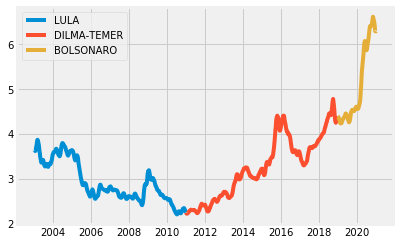

In [11]:
plt.plot(lula['Time'], lula['rolling_mean'], label="LULA")
plt.plot(dilma_temer['Time'], dilma_temer['rolling_mean'], label="DILMA-TEMER")
plt.plot(bolsonaro['Time'], bolsonaro['rolling_mean'], label="BOLSONARO")
plt.legend()
plt.show()

In [12]:
lula['rolling_mean'].value_counts().sort_index()

2.210513    1
2.211047    1
2.211387    1
2.211590    1
2.212260    1
           ..
3.868880    1
3.869470    1
3.870557    1
3.872683    1
3.873720    1
Name: rolling_mean, Length: 2050, dtype: int64

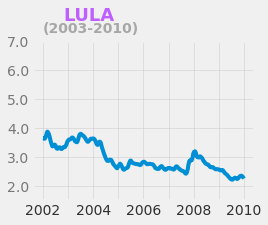

In [13]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(2,3,1)
ax1.set_ylim(1.5, 7.0)
ax1.set_yticks([2.0, 3.0,4.0, 5.0,6.0,7.0])
ax1.set_yticklabels(['2.0', '3.0','4.0', '5.0','6.0','7.0'],
                   alpha=0.5)
ax1.grid(alpha=0.5)    

### Ax1: Bush
ax1.plot(lula['Time'], lula['rolling_mean'])
ax1.set_xticklabels(['', '2002', '', '2004', '', '2006', '',
                     '2008', '','2010'],
                   alpha=0.8)
ax1.text(731516.0, 7.7, 'LULA', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 7.3, '(2003-2010)', weight='bold',
        alpha=0.3)
plt.show()

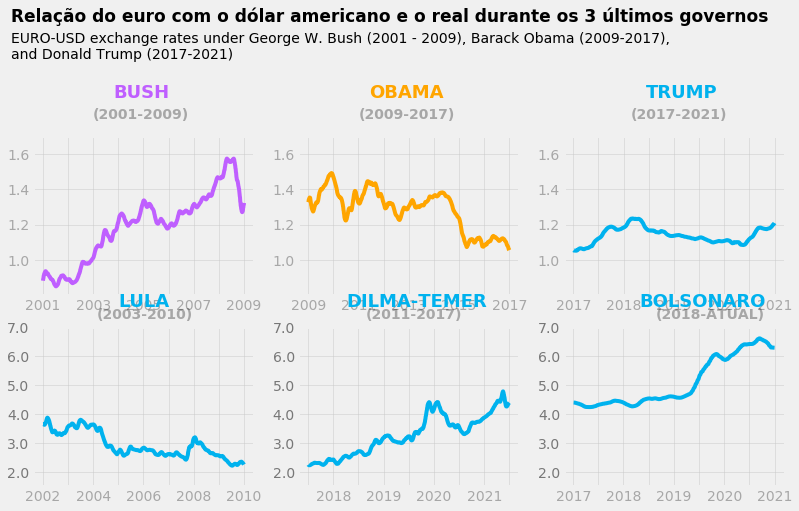

In [16]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
plt.tight_layout()
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#ax4 = plt.subplot(2,1,2)
axes1 = [ax1, ax2, ax3]
axes2 = [ax4, ax5, ax6]


### Changes to all the subplots
for ax in axes1:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)

### Changes to all the subplots
for ax in axes2:
    ax.set_ylim(1.5, 7.0)
    ax.set_yticks([2.0, 3.0,4.0, 5.0,6.0,7.0])
    ax.set_yticklabels(['2.0', '3.0','4.0', '5.0','6.0','7.0'],
                   alpha=0.5)
    ax.grid(alpha=0.5)
    

    
### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: lula
ax4.plot(lula['Time'], lula['rolling_mean'],
        color='#00B2EE')
ax4.set_xticklabels(['', '2002', '', '2004', '', '2006', '',
                     '2008', '','2010'], alpha=0.3)
ax4.text(732316.0, 7.7, 'LULA', fontsize=18, weight='bold',color='#00B2EE')
ax4.text(732000.0, 7.3, '(2003-2010)', weight='bold',alpha=0.3)

### Ax5: dilma_temer
ax5.plot(dilma_temer['Time'], dilma_temer['rolling_mean'],
        color='#00B2EE')
ax5.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax5.text(734700.0, 7.7, 'DILMA-TEMER', fontsize=18, weight='bold',color='#00B2EE')
ax5.text(734970.0, 7.3, '(2011-2017)', weight='bold',alpha=0.3)

### Ax4: bolsonaro
ax6.plot(bolsonaro['Time'], bolsonaro['rolling_mean'],
        color='#00B2EE')
ax6.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax6.text(737300.0, 7.7, 'BOLSONARO', fontsize=18, weight='bold',color='#00B2EE')
ax6.text(737360.0, 7.3, '(2018-ATUAL)', weight='bold',alpha=0.3)




### Adding a title and a subtitle
ax1.text(730016.0, 2.35, 'Relação do euro com o dólar americano e o real durante os 3 últimos governos',
         fontsize=17, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=14)

### Adding a signature

plt.show()